In [249]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.palettes import Category10
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('cleaned_github_data.csv')
df.shape

(266138, 11)

## Explore the relationship between the number of stars and the popularity of different licenses

In [322]:
stars_licence_rel=df.groupby('licence')['stars'].sum().sort_values(ascending=False).nlargest(7)

fig = px.bar(stars_licence_rel)
fig.show()


## Number of repo for each licence

In [323]:
# Get the count of repositories for each license
license_counts = df['licence'].value_counts().nlargest(7).reset_index()

# Rename the columns
license_counts.columns = ['License', 'Count']

# Sort the licenses by count in descending order
license_counts = license_counts.sort_values(by='Count', ascending=False)

# Configure output to notebook
output_notebook()

# Create a Bokeh figure
p = figure(y_range=license_counts['License'], height=400, width=800, title='Popularity of Repositories by License', toolbar_location=None)

# Add a horizontal bar plot
p.hbar(y='License', right='Count', source=license_counts, height=0.8)

# Add hover tool
hover = HoverTool(tooltips=[('License', '@License'), ('Count', '@Count')])
p.add_tools(hover)

# Show the plot
show(p)

Loading BokehJS ...

### Analyze the relation between stars and forks

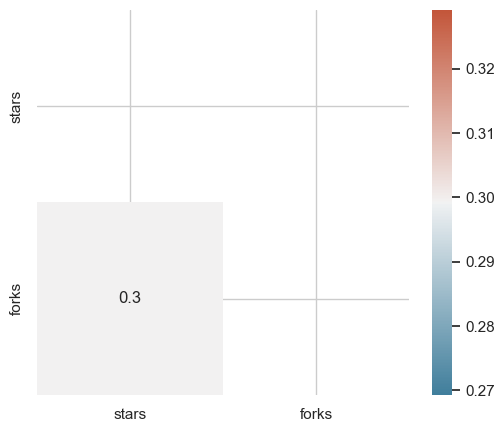

In [288]:
# Correlation between different variables
import numpy as np
corr = df[['stars','forks']].corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(6, 5))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

plt.show()

## Popularity of langauge by time

In [102]:
import ipywidgets as widgets
from IPython.display import clear_output

w=widgets.Dropdown(
    options=df['technology'].unique().tolist(),
    rows=10,
    description='technology:',
    disabled=False
)


def on_value_change(change):
    clear_output(wait=True)
    st=df[df['technology']==change['new']]
    st['project_date']=pd.to_datetime(st['project_date']).dt.to_period('M')
    # Assuming your pandas series is stored in a variable called 'series'
    df_st = st.groupby(['project_date','technology'])['name'].count().reset_index()
    df_st['project_date']=df_st['project_date'].astype(str)

    # Configure Bokeh to output the plot in the Jupyter Notebook
    output_notebook()

    # Create a color palette for different technologies/languages
    colors = Category10[10]

    # Create the line plot using Bokeh
    p = figure(title='Evaluation of Technologies/Languages by time',
            x_axis_label='Peroid',
            y_axis_label='Number of repo',
            x_range=df_st['project_date'].unique())

    # Loop through each technology and add a line glyph to the plot
    for i, technology in enumerate(df_st['technology'].unique()):
        tech_df = df_st[df_st['technology'] == technology]
        p.line(x='project_date', y='name', source=tech_df,
            legend_label=technology, line_color=colors[i % len(colors)])

    # Rotate x-axis labels for better visibility
    p.xaxis.major_label_orientation = 45
    display(w)
    show(p)

w.observe(on_value_change, names='value')
display(w)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_23184\3089902842.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  st['project_date']=pd.to_datetime(st['project_date']).dt.to_period('M')
C:\Users\Youcode\AppData\Local\Temp\ipykernel_23184\3089902842.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['project_date']=pd.to_datetime(st['project_date']).dt.to_period('M')


Loading BokehJS ...

Dropdown(description='technology:', index=9, options=('Rust', 'TypeScript', 'Jupyter Notebook', 'HCL', 'Swift'…

In [326]:
st=df[df['technology'].isin(df.groupby('technology')['name'].count().sort_values(ascending=False).nlargest(5).keys())]
st['project_date']=pd.to_datetime(st['project_date']).dt.to_period('M')

from bokeh.palettes import Category10

# Assuming your pandas series is stored in a variable called 'series'
df_st = st.groupby(['project_date','technology'])['name'].count().reset_index()
df_st['project_date']=df_st['project_date'].astype(str)

# Configure Bokeh to output the plot in the Jupyter Notebook
output_notebook()

# Create a color palette for different technologies/languages
colors = Category10[10]

# Create the line plot using Bokeh
p = figure(title='Evaluation of Technologies/Languages by time',
           x_axis_label='Peroid',
           y_axis_label='Number of repo',
           x_range=df_st['project_date'].unique())

# Loop through each technology and add a line glyph to the plot
for i, technology in enumerate(df_st['technology'].unique()):
    tech_df = df_st[df_st['technology'] == technology]
    p.line(x='project_date', y='name', source=tech_df,
           legend_label=technology, line_color=colors[i % len(colors)])

# Rotate x-axis labels for better visibility
p.xaxis.major_label_orientation = 45

# Display the plot
show(p)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_23184\2464293733.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\Youcode\AppData\Local\Temp\ipykernel_23184\2464293733.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Loading BokehJS ...

## Most common used lang

In [327]:
# Get the count of occurrences for each technology
technology_counts = df['technology'].value_counts().reset_index()

# Rename the columns
technology_counts.columns = ['Technology', 'Count']

# Sort the technologies by count in descending order
technology_counts = technology_counts.sort_values(by='Count', ascending=False).nlargest(10,columns=['Count'])

# Configure output to notebook
output_notebook()

# Create a Bokeh figure
p = figure(x_range=technology_counts['Technology'], height=400, width=800, title='Popular Programming Languages/Technologies')

# Add a bar plot
p.vbar(x='Technology', top='Count', source=technology_counts, width=0.8)

# Rotate x-axis labels
p.xaxis.major_label_orientation = 45

# Add hover tool
hover = HoverTool(tooltips=[('Technology', '@Technology'), ('Count', '@Count')])
p.add_tools(hover)

# Show the plot
show(p)


Loading BokehJS ...

## Owner distribution

In [283]:
# Get the count of repositories for each owner
owner_counts = df['owner'].value_counts().reset_index()

# Rename the columns
owner_counts.columns = ['Owner', 'Count']

# Sort the owners by count in descending order
owner_counts = owner_counts.sort_values(by='Count', ascending=False)


fig = px.pie(owner_counts, names='Owner', values='Count',title='Distribution of Repositories across Owners')
fig.show()


## 2023 May Contributor

In [2]:
df_ct=pd.read_csv('contributor.csv')

### Contributor by total commit

In [328]:
top_ct=df_ct.groupby('contributor')['commit'].sum().sort_values(ascending=False).nlargest(15)[2:15]

keys=[k for k in top_ct.keys()]
values=[v for v in top_ct]

data = dict(
    commit=values,
    contributor=keys)
fig = px.funnel(data, x='commit', y='contributor')
fig.show()
print(keys,values)

['mjtechworks', 'gayanMatch', 'juhosg', 'SuperDev314', 'ffainelli', 'VitRod', 'fluffypony', 'moneromooo-monero', 'littleMatch02', 'jow-', 'MartinBernstorff', 'revived-midas', 'nbd168'] [5302, 5206, 4536, 3877, 3361, 3260, 3078, 3050, 2825, 2778, 2643, 2505, 2500]


## Contributor by total commit and language

In [311]:
top_ct=df_ct.groupby('contributor')['repo_name'].count().sort_values(ascending=False).nlargest(15)
top_ct=top_ct[~top_ct.index.str.contains('bot')].reset_index()

(13132, 13)

### Contributor by total repo

In [291]:
top_ct=df_ct.groupby('contributor')['repo_name'].count().sort_values(ascending=False).nlargest(15)
top_ct=top_ct[~top_ct.index.str.contains('bot')].reset_index()
fig = px.funnel(top_ct, x='contributor', y='repo_name')
fig.show()


### Analyze the distribution of project topics and identify the most common ones.

In [8]:
from ast import literal_eval

topics=[]
for index,value in df['topics'].items():
    for topic in literal_eval(value):
        topics.append(topic)

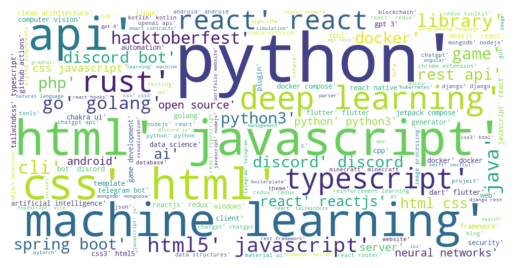

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Delete values No topics
topics=[value for value in topics if value != "No topics"]

# # Create and generate a word cloud image:
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                min_font_size = 10).generate(str(topics))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


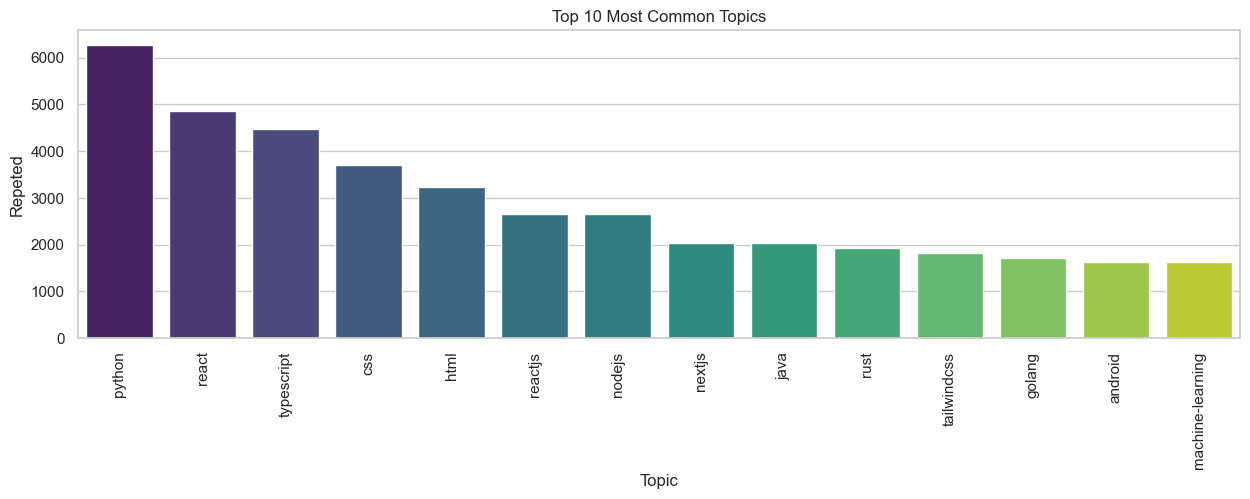

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df_top_topics=pd.DataFrame(topics,columns=['topic'])
top_ten=df_top_topics.groupby('topic')['topic'].count().sort_values(ascending=False)[1:15].to_dict()

keys=[k for k in top_ten.keys()]
values=[v for v in top_ten.values()]

#Create the bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x=keys, y=values, palette="viridis")

# Customize the plot
plt.xlabel("Topic")
plt.xticks(rotation=90)
plt.ylabel("Repeted")
plt.title("Top 10 Most Common Topics")

# Display the plot
plt.show()